#1.working with basic building blocks of the keras API

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer 
from tensorflow.keras import Input 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

#Classical Keras Sequential model
sequential_model = Sequential() 
sequential_model.add(Dense(256,input_shape=(28 * 28 * 1,),activation='sigmoid'))
sequential_model.add(Dense(128, activation='sigmoid'))
sequential_model.add(Dense(10, activation='softmax'))

#Sequential model defined in the form of List
layers = [
        Dense(256, input_shape=(28 * 28 * 1,), activation='sigmoid'),
        Dense(128, activation='sigmoid'), 
        Dense(10, activation='softmax')
]
sequential_model_list = Sequential(layers)

#Functional API based model
input_layer = Input(shape=(28 * 28 * 1,)) 
dense_1 = Dense(256, activation='sigmoid')(input_layer) 
dense_2 = Dense(128, activation='sigmoid')(dense_1) 
predictions = Dense(10, activation='softmax')(dense_2) 
functional_model = Model(inputs=input_layer,outputs=predictions)

#API using Model subclassing
class ClassModel(Model): 
    def __init__(self):
        super(ClassModel, self).__init__() 
        self.dense_1 = Dense(256, activation='sigmoid') 
        self.dense_2 = Dense(256, activation='sigmoid') 
        self.predictions = Dense(10,activation='softmax')

    def call(self, inputs, **kwargs): 
        x = self.dense_1(inputs) 
        x = self.dense_2(x) 
        return self.predictions(x)
class_model = ClassModel()

#Data processing stuffs
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#One-hot encoding the model
label_binarizer = LabelBinarizer() 
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

#Splitting the dataset to 80%-20%
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8) 

#Compiling the 4 different models
models = { 'sequential_model': sequential_model, 
        'sequential_model_list': sequential_model_list,
        'functional_model': functional_model,
        'class_model': class_model
}
#Training the 4 different models
for name, model in models.items():
    print(f'Compiling model: {name}') 
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    print(f'Training model: {name}') 
    model.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=50,batch_size=256, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Testing model: {name}. \nAccuracy: {accuracy}')
    print('---'*10)

Compiling model: sequential_model
Training model: sequential_model
Testing model: sequential_model. 
Accuracy: 0.9803000092506409
------------------------------
Compiling model: sequential_model_list
Training model: sequential_model_list
Testing model: sequential_model_list. 
Accuracy: 0.9801999926567078
------------------------------
Compiling model: functional_model
Training model: functional_model
Testing model: functional_model. 
Accuracy: 0.9787999987602234
------------------------------
Compiling model: class_model
Training model: class_model
Testing model: class_model. 
Accuracy: 0.9779999852180481
------------------------------


#2.loading images using the keras API

In [6]:
#installing the pillow 
!pip install Pillow

There are 270,000 images in the dataset
Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
Image format: PNG
Image mode: RGB
Image size: (32, 32)
Image type: <class 'numpy.ndarray'>
Image array shape: (32, 32, 3)
Found 270000 images belonging to 3 classes.


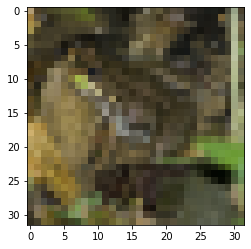

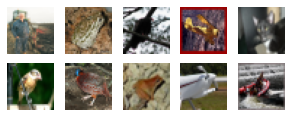

In [12]:
import glob 
import os
import tarfile 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import get_file


DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y' 
DATA_NAME = 'cinic10' 
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])


downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)
# Build the path to the data directory based on the location of the downloaded file.
data_directory, _ = downloaded_file_location.rsplit(os. path.sep, maxsplit=1)
data_directory = os.path.sep.join([data_directory, DATA_NAME])
# Only extract the data if it hasn't been extracted already
if not os.path.exists(data_directory):
    tar = tarfile.open(downloaded_file_location) 
    tar.extractall(data_directory)


data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])
image_paths = list(glob.glob(data_pattern)) 
print(f'There are {len(image_paths):,} images in the dataset')

sample_image = load_img(image_paths[0]) 
print(f'Image type: {type(sample_image)}') 
print(f'Image format: {sample_image.format}') 
print(f'Image mode: {sample_image.mode}')
print(f'Image size: {sample_image.size}')


sample_image_array = img_to_array(sample_image) 
print(f'Image type: {type(sample_image_array)}')
print(f'Image array shape: {sample_image_array.shape}')
plt.imshow(sample_image_array / 255.0)


image_generator = ImageDataGenerator(horizontal_flip=True, rescale=1.0 / 255.0)


iterator = (image_generator .flow_from_directory(directory=data_directory, batch_size=10))
for batch, _ in iterator: 
    plt.figure(figsize=(5, 5))
    for index, image in enumerate(batch, start=1): 
        ax = plt.subplot(5, 5, index) 
        plt.imshow(image)
        plt.axis('off')
    plt.show()
    break

#3.loading images using the tf.Data.Dataset API

Data downloaded to /root/.keras/datasets/cinic10
Sample image path: /root/.keras/datasets/cinic10/valid/frog/n01641577_9228.png
Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
Image format: PNG
Image mode: RGB
Image size: (32, 32)
Image array shape: (32, 32, 3)
Found 270000 images belonging to 3 classes.


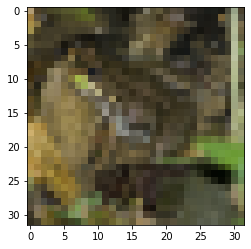

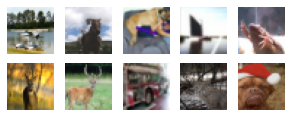

In [17]:
import glob
import os
import tarfile

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import get_file

DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = 'cinic10'
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

# Downloading the data.
downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)

data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
data_directory = os.path.sep.join([data_directory, DATA_NAME])
tar = tarfile.open(downloaded_file_location)

if not os.path.exists(data_directory):
    tar.extractall(data_directory)

print(f'Data downloaded to {data_directory}')
data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])

image_paths = list(glob.glob(data_pattern))
print(f'Sample image path: {image_paths[0]}')

# Load a single image
sample_image = load_img(image_paths[0])
print(f'Image type: {type(sample_image)}')
print(f'Image format: {sample_image.format}')
print(f'Image mode: {sample_image.mode}')
print(f'Image size: {sample_image.size}')

# Convert image to array
sample_image_array = img_to_array(sample_image)
print(f'Image array shape: {sample_image_array.shape}')
plt.imshow(sample_image_array / 255.0)

# Load a a batch of images.
scale_factor = 1.0 / 255.0
image_generator = ImageDataGenerator(horizontal_flip=True, rescale=scale_factor)

iterator = (image_generator
            .flow_from_directory(directory=data_directory,
                                 batch_size=10))
for batch, _ in iterator:
    plt.figure(figsize=(5, 5))
    for index, image in enumerate(batch, start=1):
        ax = plt.subplot(5, 5, index)
        plt.imshow(image)
        plt.axis('off')

    plt.show()
    break

#4.saving and loading a model

In [20]:
import json 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer 
from tensorflow.keras import Model 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import ReLU 
from tensorflow.keras.layers import Softmax 
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json


def load_data(): 
    (X_train, y_train), (X_test, y_test) = mnist.load_data() 
    # Normalize data.
    X_train = X_train.astype('float32') / 255.0 
    X_test = X_test.astype('float32') / 255.0

    # Reshape grayscale to include channel dimension. 
    X_train = np.expand_dims(X_train, axis=3) 
    X_test = np.expand_dims(X_test, axis=3)

    # Process labels.
    label_binarizer = LabelBinarizer() 
    y_train = label_binarizer.fit_transform(y_train) 
    y_test = label_binarizer.fit_transform(y_test)

    return X_train, y_train, X_test, y_test


def build_network(): 
    input_layer = Input(shape=(28, 28, 1)) 
    convolution_1 = Conv2D(kernel_size=(2, 2), padding='same', 
                           strides=(2, 2),filters=32)(input_layer)
    activation_1 = ReLU()(convolution_1) 
    batch_normalization_1 = BatchNormalization() (activation_1)
    pooling_1 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1),
                            padding='same')(batch_normalization_1) 
    dropout = Dropout(rate=0.5)(pooling_1)
    flatten = Flatten()(dropout) 
    dense_1 = Dense(units=128)(flatten) 
    activation_2 = ReLU()(dense_1) 
    dense_2 = Dense(units=10)(activation_2) 
    output = Softmax()(dense_2)
    network = Model(inputs=input_layer, outputs=output)
    return network


def evaluate(model, X_test, y_test): 
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy: {accuracy}')

X_train, y_train, X_test, y_test = load_data() 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)
model = build_network()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train,
        validation_data=(X_valid, y_valid), epochs=50,
        batch_size=1024,verbose=0)

model.save('model_and_weights.hdf5') 

# Loading model and weights as HDF5. 
loaded_model = load_model('model_and_weights.hdf5')

# Predicting using loaded model.
evaluate(loaded_model, X_test, y_test)

Accuracy: 0.9833999872207642


#5.creating a basic image classifier

In [21]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ostu8a1c
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ostu8a1c
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=173555 sha256=73ca6c060db9f764433d45cd1e87336828884a925137702970fa60367f14f557
  Stored in directory: /tmp/pip-ephem-wheel-cache-m1glnax3/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [28]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer 
from tensorflow.keras import Model
from tensorflow.keras.datasets import fashion_mnist as fm 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import ELU 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import Softmax 
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

def load_dataset(): 
    (X_train, y_train), (X_test, y_test) = fm.load_data()
    X_train = X_train.astype('float32') / 255.0 
    X_test = X_test.astype('float32') / 255.0
    # Reshape grayscale to include channel dimension. 
    X_train = np.expand_dims(X_train, axis=3) 
    X_test = np.expand_dims(X_test, axis=3)
    label_binarizer = LabelBinarizer() 
    y_train = label_binarizer.fit_transform(y_train) 
    y_test = label_binarizer.fit_transform(y_test)
    (X_train, X_val,y_train, y_val) = train_test_split(X_train, y_train,train_size=0.8)

    train_ds = (tf.data.Dataset.from_tensor_slices((X_train, y_train)))
    val_ds = (tf.data.Dataset.from_tensor_slices((X_val, y_val))) 
    test_ds = (tf.data.Dataset.from_tensor_slices((X_test, y_test)))

    return train_ds,val_ds,test_ds


def build_network(): 
    input_layer = Input(shape=(28, 28, 1)) 
    x = Conv2D(filters=20,kernel_size=(5, 5), padding='same',strides=(1, 1))(input_layer) 
    x = ELU()(x)
    x = BatchNormalization()(x) 
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = Dropout(0.5)(x) 
    x = Conv2D(filters=50,kernel_size=(5, 5), padding='same', strides=(1, 1))(x)
    x = ELU()(x)
    x = BatchNormalization()(x) 
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x) 
    x = Dense(units=500)(x) 
    x = ELU()(x)
    x = Dropout(0.5)(x)
    x = Dense(10)(x) 
    output = Softmax()(x)
    model = Model(inputs=input_layer, outputs=output)
    return model

def plot_model_history(model_history, metric, ylim=None): 
    plt.style.use('seaborn-darkgrid') 
    plotter = tfdocs.plots.HistoryPlotter() 
    plotter.plot({'Model': model_history}, metric=metric)
    plt.title(f'{metric.upper()}') 
    if ylim is None: 
        plt.ylim([0, 1])
    else: 
        plt.ylim(ylim)
    plt.savefig(f'{metric}.png')
    plt.close()

BATCH_SIZE = 256 
BUFFER_SIZE = 1024
train_dataset, val_dataset, test_dataset = load_dataset() 
train_dataset = (train_dataset.shuffle(buffer_size=BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=BUFFER_SIZE)) 

val_dataset = (val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=BUFFER_SIZE))

test_dataset = test_dataset.batch(BATCH_SIZE)

EPOCHS = 100 
model = build_network()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS, verbose=1)

plot_model_history(model_history, 'loss', [0., 2.0]) 
plot_model_history(model_history, 'accuracy')


plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')


model.save('model.hdf5')
loaded_model = load_model('model.hdf5') 
results = loaded_model.evaluate(test_dataset, verbose=1)
print(f'Loss: {results[0]}, Accuracy: {results[1]}')

Epoch 1/100
188/188 [==============================] - 3s 12ms/step - loss: 0.9736 - accuracy: 0.7134 - val_loss: 1.6536 - val_accuracy: 0.6247
Epoch 2/100
188/188 [==============================] - 2s 11ms/step - loss: 0.5605 - accuracy: 0.8031 - val_loss: 0.6627 - val_accuracy: 0.8045
Epoch 3/100
188/188 [==============================] - 2s 11ms/step - loss: 0.4720 - accuracy: 0.8310 - val_loss: 0.3780 - val_accuracy: 0.8690
Epoch 4/100
188/188 [==============================] - 2s 11ms/step - loss: 0.4118 - accuracy: 0.8492 - val_loss: 0.3190 - val_accuracy: 0.8882
Epoch 5/100
188/188 [==============================] - 2s 11ms/step - loss: 0.3828 - accuracy: 0.8595 - val_loss: 0.3034 - val_accuracy: 0.8924
Epoch 6/100
188/188 [==============================] - 2s 11ms/step - loss: 0.3538 - accuracy: 0.8686 - val_loss: 0.2876 - val_accuracy: 0.8944
Epoch 7/100
188/188 [==============================] - 2s 11ms/step - loss: 0.3396 - accuracy: 0.8739 - val_loss: 0.2739 - val_accuracy: